In [265]:
# Import required libraries
import pandas as pd
import numpy as np
import numpy.random as rnd
from MCForecastTools import MCSimulation
import pathlib as Path

In [266]:
# read csv data
ng_df = pd.read_csv('../Marc/Resources/NG_Nymex_Max-2023-2013.csv')
wti_df = pd.read_csv('../Marc/Resources/WTI_Nymex_Max-2023-2013.csv')

In [267]:
# clean NG data
ng_df=ng_df.drop(columns=['Volume','Open', 'High', 'Low'])
ng_df.columns=('date','close')
ng_df.head()

,date,close
0,01/18/2023,3.311
1,01/17/2023,3.586
2,01/13/2023,3.419
3,01/12/2023,3.695
4,01/11/2023,3.671


In [268]:
# clean WTI data
wti_df=wti_df.drop(columns=['Volume','Open', 'High', 'Low'])
wti_df.columns=('date','close')
wti_df.head()

,date,close
0,01/18/2023,79.48
1,01/17/2023,80.18
2,01/13/2023,79.86
3,01/12/2023,78.39
4,01/11/2023,77.41


In [270]:
# merge WTI and NatGas data
to_merge_dict = {'NG': ng_df , 'WTI': wti_df}
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [271]:
### Create Season indicator in the data to be able to select seasons

merged_df['season_date'] = merged_df['NG','date']
merged_df = merged_df.set_index('season_date')

merged_df['month_date'] = pd.DatetimeIndex(merged_df.index).strftime('%m%d')
merged_df['month_date'] = merged_df['month_date'].astype(float)

# create a column that displays the season (winter, spring, fall or summer)
merged_df['season'] = np.where((merged_df['month_date'] >= 1221),"winter",
                                np.where((merged_df['month_date'] >=101) & (merged_df['month_date'] <321), "winter",
                                         np.where((merged_df['month_date'] >=321) & (merged_df['month_date'] <621), "spring",
                                                  np.where((merged_df['month_date'] >=621) & (merged_df['month_date'] <921), "summer","fall"))))

merged_df.head()

NG                WTI        month_date  season
                   date  close        date  close                   
season_date                                                         
01/18/2023   01/18/2023  3.311  01/18/2023  79.48      118.0  winter
01/17/2023   01/17/2023  3.586  01/17/2023  80.18      117.0  winter
01/13/2023   01/13/2023  3.419  01/13/2023  79.86      113.0  winter
01/12/2023   01/12/2023  3.695  01/12/2023  78.39      112.0  winter
01/11/2023   01/11/2023  3.671  01/11/2023  77.41      111.0  winter

In [275]:
# Define function to select data only applicable to a certain season to use for Monte Carlo simulation
def select_season(season):
    portfolio_data_sliced = merged_df.loc[merged_df['season'] == season]
    portfolio_data_sliced.reindex
    del portfolio_data_sliced['month_date']
    del portfolio_data_sliced['season']
    
    return(portfolio_data_sliced)

In [276]:
# Define function to run selected season data and adjust for length of season and balance weight to most correlated energy source with kWh
def monte_carlo_sim(season,input_season_days):
        
    MC_simulation = MCSimulation(
        portfolio_data= season,
        weights=[1, 0],
        num_simulation=1000,
        num_trading_days= input_season_days,
    )
    
    return(MC_simulation)

In [278]:
# 1. run defined select_season function with season indicator, 2. run MC simulation with seasonal data and length of season

winter = select_season('winter')
winter =  monte_carlo_sim(winter,89)

spring = select_seaons('spring')
spring =  monte_carlo_sim(spring,93)

summer = select_season('summer')
summer =  monte_carlo_sim(summer,94)

fall = select_season('fall')
fall =  monte_carlo_sim(fall,89)


In [279]:
# Display the seasonal data
display(winter.portfolio_data.tail())
display(spring.portfolio_data.tail())
display(summer.portfolio_data.tail())
display(fall.portfolio_data.tail())

NG                             WTI                    
                   date  close daily_return        date  close daily_return
season_date                                                                
01/25/2013   01/25/2013  3.444     0.047127  01/25/2013  95.88    -0.005807
01/24/2013   01/24/2013  3.446     0.000581  01/24/2013  95.95     0.000730
01/23/2013   01/23/2013  3.554     0.031341  01/23/2013  95.23    -0.007504
01/22/2013   01/22/2013  3.558     0.001125  01/22/2013  96.24     0.010606
01/21/2013   01/21/2013  3.566     0.002248  01/21/2013  95.56    -0.007066

NG                             WTI                    
                   date  close daily_return        date  close daily_return
season_date                                                                
03/27/2013   03/27/2013  4.068     0.010934  03/27/2013  96.58    -0.006685
03/26/2013   03/26/2013  3.976    -0.022616  03/26/2013  96.34    -0.002485
03/25/2013   03/25/2013  3.865    -0.027918  03/25/2013  94.81    -0.015881
03/22/2013   03/22/2013  3.927     0.016041  03/22/2013  93.71    -0.011602
03/21/2013   03/21/2013  3.935     0.002037  03/21/2013  92.45    -0.013446

NG                             WTI                    
                   date  close daily_return        date  close daily_return
season_date                                                                
06/27/2013   06/27/2013  3.582     0.004769  06/27/2013  97.05     0.005075
06/26/2013   06/26/2013  3.707     0.034897  06/26/2013  95.50    -0.015971
06/25/2013   06/25/2013  3.647    -0.016186  06/25/2013  95.32    -0.001885
06/24/2013   06/24/2013  3.739     0.025226  06/24/2013  95.18    -0.001469
06/21/2013   06/21/2013  3.771     0.008558  06/21/2013  93.69    -0.015655

NG                             WTI                     
                   date  close daily_return        date   close daily_return
season_date                                                                 
09/27/2013   09/27/2013  3.589     0.008146  09/27/2013  102.87     0.005277
09/26/2013   09/26/2013  3.498    -0.025355  09/26/2013  103.03     0.001555
09/25/2013   09/25/2013  3.493    -0.001429  09/25/2013  102.66    -0.003591
09/24/2013   09/24/2013  3.492    -0.000286  09/24/2013  103.13     0.004578
09/23/2013   09/23/2013  3.602     0.031501  09/23/2013  103.59     0.004460

In [280]:
# Run monte carlo simulation for the 4 different seasons

import warnings
warnings.filterwarnings("ignore")
winter.calc_cumulative_return()
spring.calc_cumulative_return()
summer.calc_cumulative_return()
fall.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.072022,0.971118,1.007415,1.014350,0.941961,1.026089,0.989522,1.061536,1.091138,1.069273,...,1.029889,0.957045,1.000342,0.975636,1.108684,1.015567,0.925290,0.942196,1.144817,1.036826
2,1.066071,0.846828,1.076209,1.058893,0.932657,1.110614,1.045350,1.104030,1.132846,1.030226,...,1.040096,0.945038,1.033415,0.918726,1.035095,1.002015,0.922023,0.866735,1.116250,1.034328
3,0.885134,0.870922,1.064283,0.989424,0.945548,1.069983,1.080105,1.127744,1.030191,1.037793,...,0.972754,1.027903,1.014230,0.974923,0.919869,0.972653,0.824892,0.853846,1.173790,1.000448
4,0.908861,0.806033,0.992683,0.934620,0.974675,1.125911,1.061929,1.074885,1.087463,0.946468,...,0.947250,1.007200,1.016867,0.908354,0.994178,0.870042,0.867716,0.813895,1.218822,1.038429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.678677,0.483854,0.731644,0.364467,1.230464,1.179382,1.463982,0.460109,0.831124,0.664305,...,0.808923,0.277540,0.525175,3.948997,1.368522,0.716429,0.857284,1.011178,2.904077,0.791782
86,2.655903,0.456714,0.707173,0.322796,1.294921,1.168722,1.428322,0.452774,0.806627,0.630314,...,0.808656,0.264287,0.528890,3.922294,1.359025,0.687572,0.880640,0.958810,3.058495,0.804039
87,2.712108,0.496122,0.692672,0.314787,1.190069,1.100754,1.223316,0.483723,0.824086,0.585053,...,0.790353,0.274016,0.531580,3.848186,1.292762,0.682240,0.893015,0.944091,2.782555,0.809105
88,3.022424,0.482107,0.653972,0.331393,1.227036,1.098635,1.295205,0.493734,0.781301,0.547875,...,0.762477,0.297086,0.560922,3.431939,1.198702,0.610044,0.875338,0.938204,2.697736,0.877061


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 89 Trading Days.'}>

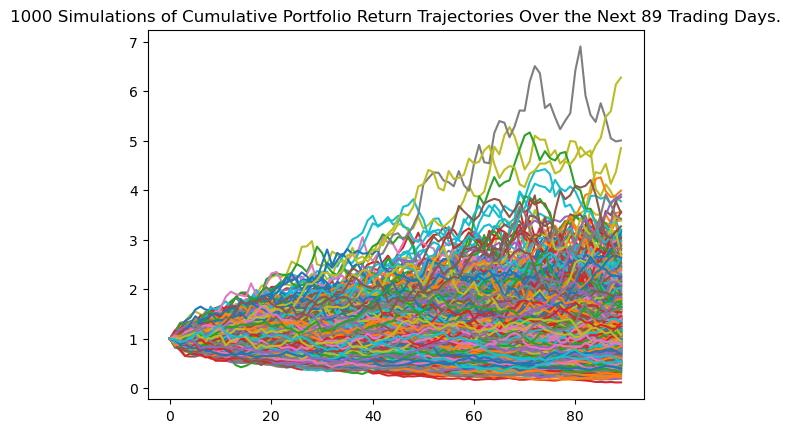

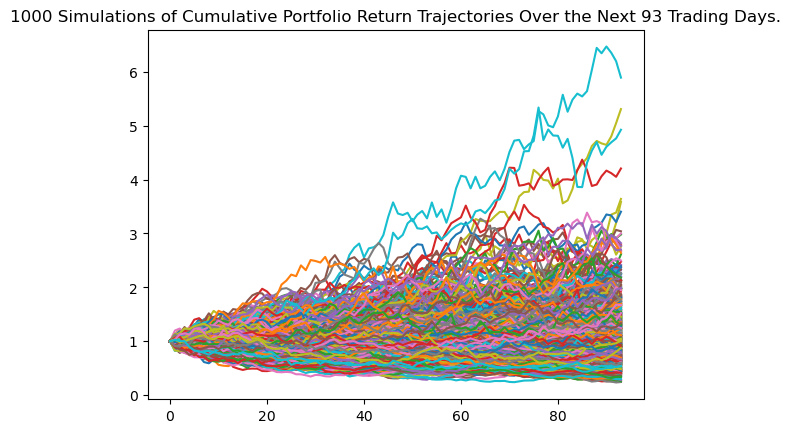

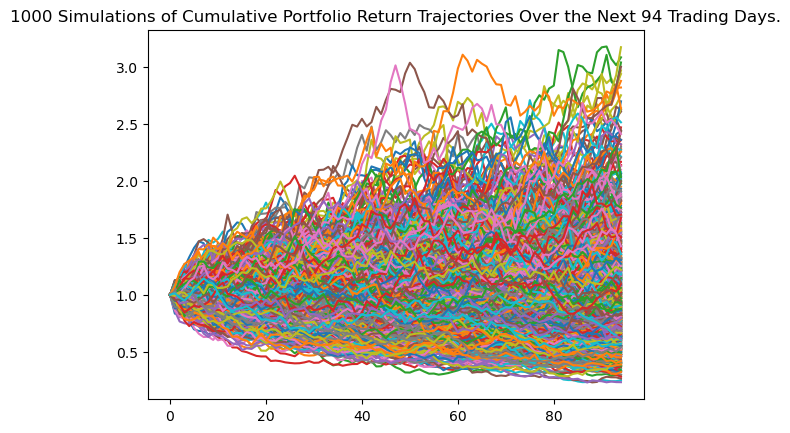

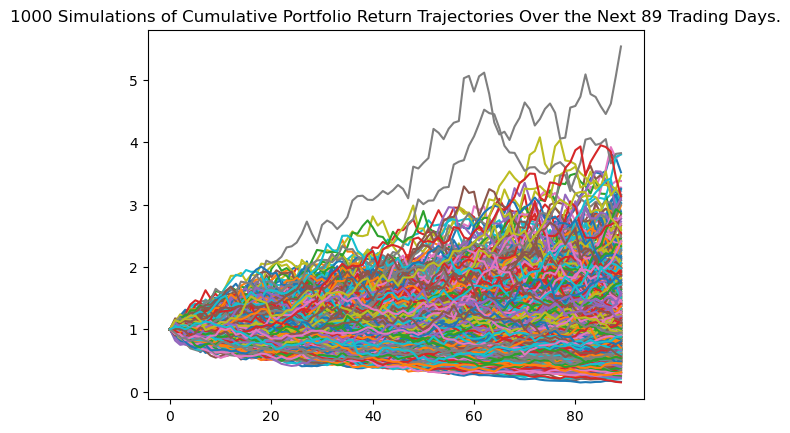

In [281]:
# plot simulations per season

winter.plot_simulation()
spring.plot_simulation()
summer.plot_simulation()
fall.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

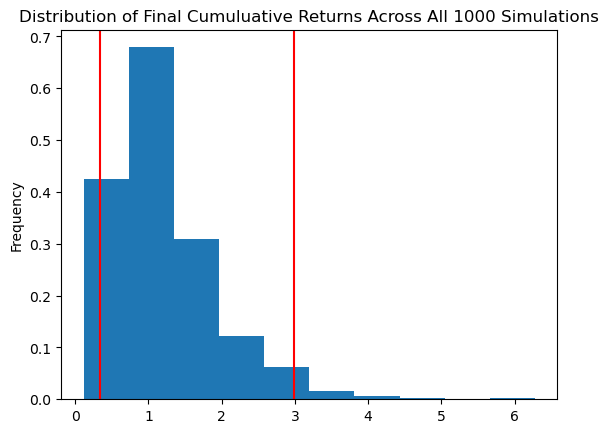

In [284]:
display(winter.plot_distribution())

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

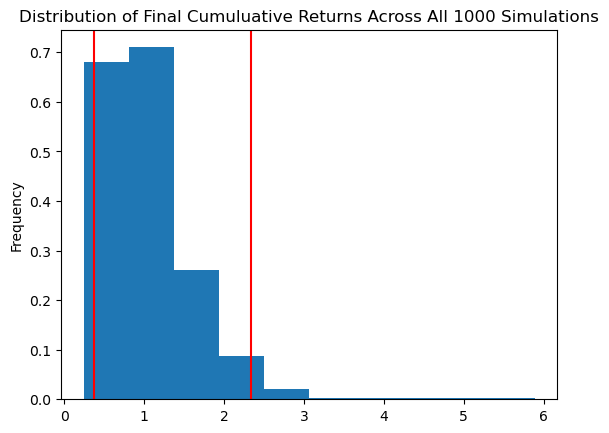

In [285]:
display(spring.plot_distribution())

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

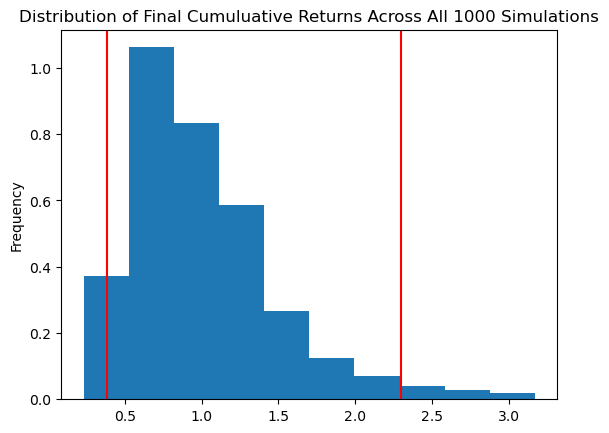

In [286]:
display(summer.plot_distribution())

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

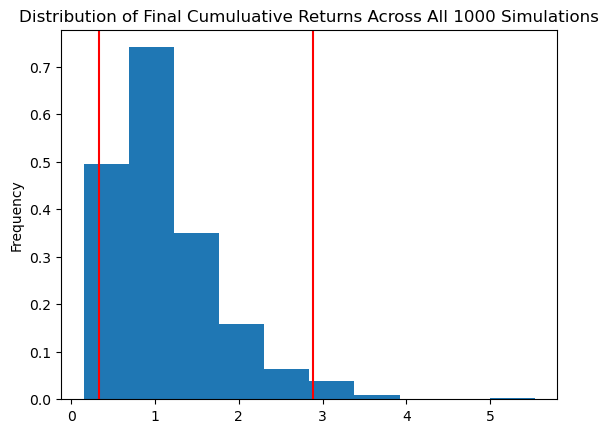

In [287]:
display(fall.plot_distribution())

In [288]:
#one_year_simulation.summarize_cumulative_return()

display(winter.summarize_cumulative_return())
display(spring.summarize_cumulative_return())
display(summer.summarize_cumulative_return())
display(fall.summarize_cumulative_return())

count           1000.000000
mean               1.213174
std                0.713005
min                0.120440
25%                0.713806
50%                1.054915
75%                1.533297
max                6.275329
95% CI Lower       0.334046
95% CI Upper       2.988659
Name: 89, dtype: float64

count           1000.000000
mean               1.052479
std                0.567709
min                0.244391
25%                0.670473
50%                0.929222
75%                1.300803
max                5.890595
95% CI Lower       0.373863
95% CI Upper       2.332155
Name: 93, dtype: float64

count           1000.000000
mean               1.009034
std                0.479006
min                0.234134
25%                0.678843
50%                0.902249
75%                1.231376
max                3.171664
95% CI Lower       0.385849
95% CI Upper       2.299609
Name: 94, dtype: float64

count           1000.000000
mean               1.131963
std                0.646141
min                0.149719
25%                0.674061
50%                0.980958
75%                1.413386
max                5.533036
95% CI Lower       0.327853
95% CI Upper       2.887278
Name: 89, dtype: float64